In [ ]:
import numpy as np
import math
from numpy.linalg import inv
np.set_printoptions(threshold=np.inf)
area=4e-4
E=2.1e11
nodes=int(input("Enter the nodes: "))

GLOBAL=np.zeros((nodes*2,nodes*2))
add=np.zeros((nodes*2,nodes*2))
joints=np.zeros((nodes,3))
for i in range(nodes):
    print(i+1)
    joints[i][0]=i+1    #the joint number
    joints[i][1]=input("X:")
    joints[i][2]=input("Y:")

ELEMENT=int(input("Enter the ELEMENTS: "))
element=np.zeros((ELEMENT,9))
print("Enter the nodes one after the other corresponding to the element that is displayed")
for j in range(ELEMENT):
    print("\n")
    print("ELEMENT NUMBER:",j+1)
    element[j][0]=j+1
    element[j][1]=input("Enter the NODE I:")
    element[j][2]=input("Enter the NODE II:")
    #element[j][3]=input("Enter the angle   :")
    #element[j][3]=math.radians(element[j][3])
    try:
        element[j][3]=np.arctan((joints[int(element[j][2]-1)][2]-joints[int(element[j][1]-1)][2])/(joints[int(element[j][2]-1)][1]-joints[int(element[j][1]-1)][1]))
    except:
        element[j][3]=np.tan(90)
    element[j][4]=joints[int(element[j][1]-1)][1]
    element[j][5]=joints[int(element[j][1]-1)][2]
    element[j][6]=joints[int(element[j][2]-1)][1]
    element[j][7]=joints[int(element[j][2]-1)][2]
    element[j][8]=((element[j][4]-element[j][6])**2+(element[j][5]-element[j][7])**2)**0.5


small=np.zeros((2,2))

#print(element)

for i in range(ELEMENT):
    print("Element:",element[i][0],"node connection:",element[i][1],element[i][2],"Angle:",np.degrees(element[i][3]),"L:",element[i][8])
    small[0][0]=round((np.cos(element[i][3])**2)*area*E/element[i][8],3)
    small[0][1]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
    small[1][0]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
    small[1][1]=round((np.sin(element[i][3])**2)*area*E/element[i][8],3)
    #print(small)
    #print(area*E/element[i][8])
    for x in range(nodes*2):
        for y in range(nodes*2):
            if(x==2*(element[i][1]-1) and y==2*(element[i][1]-1)):
                add[x][y]=small[0][0]
                add[x][y+1]=small[0][1]
                add[x+1][y]=small[1][0]
                add[x+1][y+1]=small[1][1]
            if(x==2*(element[i][2]-1) and y==2*(element[i][2]-1)):
                add[x][y]=small[0][0]
                add[x][y+1]=small[0][1]
                add[x+1][y]=small[1][0]
                add[x+1][y+1]=small[1][1]
            if(x==2*(element[i][1]-1) and y==2*(element[i][2]-1)):
                add[x][y]=-small[0][0]
                add[x][y+1]=-small[0][1]
                add[x+1][y]=-small[1][0]
                add[x+1][y+1]=-small[1][1]
            if(x==2*(element[i][2]-1) and y==2*(element[i][1]-1)):
                add[x][y]=-small[0][0]
                add[x][y+1]=-small[0][1]
                add[x+1][y]=-small[1][0]
                add[x+1][y+1]=-small[1][1]
    #print(add)
    GLOBAL=GLOBAL+add
    add.fill(0)
    small.fill(0)
#print(GLOBAL)
Forces=np.zeros((nodes*2,1))
vi=int(input("Enter the Total number of nodes where Point loads are applied:"))
ForceNodenumbers=np.zeros((vi))
for i in range(vi):
    ForceNodenumbers[i]=int(input("Enter the Node numbers where Load is applied one by one:"))
for i in range(vi):
    print("\n")
    print("Force Input at Node: ",ForceNodenumbers[i])
    Forces[int(2*(ForceNodenumbers[i]-1))][0]=float(input("enter the X force in the Node:"))
    Forces[int((2*(ForceNodenumbers[i]-1))+1)][0]=float(input("enter the Y force in the Node:"))

GLOBAL=np.delete(GLOBAL, (7),axis=0)
GLOBAL=np.delete(GLOBAL, (6),axis=0)

GLOBAL=np.delete(GLOBAL, (5),axis=0)
GLOBAL=np.delete(GLOBAL, (4),axis=0)

GLOBAL=np.delete(GLOBAL, (3),axis=0)
GLOBAL=np.delete(GLOBAL, (2),axis=0)


GLOBAL=np.delete(GLOBAL, (7),axis=1)
GLOBAL=np.delete(GLOBAL, (6),axis=1)

GLOBAL=np.delete(GLOBAL, (5),axis=1)
GLOBAL=np.delete(GLOBAL, (4),axis=1)

GLOBAL=np.delete(GLOBAL, (3),axis=1)
GLOBAL=np.delete(GLOBAL, (2),axis=1)

Forces=np.delete(Forces, (7),axis=0)
Forces=np.delete(Forces, (6),axis=0)
Forces=np.delete(Forces, (5),axis=0)
Forces=np.delete(Forces, (4),axis=0)
Forces=np.delete(Forces, (3),axis=0)
Forces=np.delete(Forces, (2),axis=0)
print(GLOBAL)
print(Forces)
print(np.dot(inv(GLOBAL),Forces))

FUNCTIONS

Enter the nodes: 3
1
X:0
Y:0
2
X:-50
Y:-86.60
3
X:50
Y:-86.60
Enter the ELEMENTS: 2
Enter the nodes one after the other corresponding to the element that is displayed


ELEMENT NUMBER: 1
Enter the NODE I:1
Enter the NODE II:2


ELEMENT NUMBER: 2
Enter the NODE I:1
Enter the NODE II:3
Enter the Total number of nodes where Point loads are applied:1
Enter the Node numbers where Load is applied one by one:1


Force Input at Node:  1.0
enter the X force in the Node:12000
enter the Y force in the Node:0
Element: 1.0 node connection: 1.0 2.0 Angle: 59.999272219172624 L: 99.99779997579945
Element: 2.0 node connection: 1.0 3.0 Angle: -59.999272219172624 L: 99.99779997579945
[[0.23998416]
 [0.        ]]
[[  1.    0.    0. ]
 [  2.  -50.  -86.6]
 [  3.   50.  -86.6]]


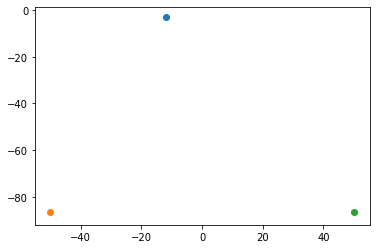

Element: 1.0 node connection: 1.0 2.0 Angle: 59.999272219172624 L: 99.99779997579945
Element: 2.0 node connection: 1.0 3.0 Angle: -59.999272219172624 L: 99.99779997579945
[[0.23998416]
 [0.        ]]
[[  1.  -12.   -3. ]
 [  2.  -50.  -86.6]
 [  3.   50.  -86.6]]


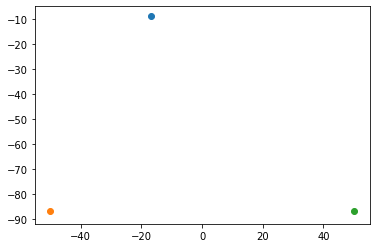

Element: 1.0 node connection: 1.0 2.0 Angle: 59.999272219172624 L: 99.99779997579945
Element: 2.0 node connection: 1.0 3.0 Angle: -59.999272219172624 L: 99.99779997579945
[[0.23998416]
 [0.        ]]
[[  1.  -17.   -9. ]
 [  2.  -50.  -86.6]
 [  3.   50.  -86.6]]


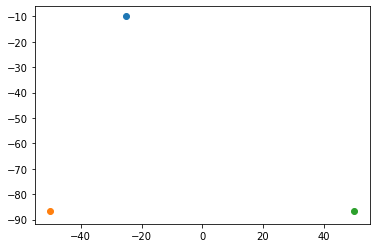

In [26]:
import numpy as np
import math
from numpy.linalg import inv
import random
import matplotlib.pyplot as plt
area=1
E=10e6
nodes=int(input("Enter the nodes: "))

GLOBAL=np.zeros((nodes*2,nodes*2))
add=np.zeros((nodes*2,nodes*2))
joints=np.zeros((nodes,3))
small=np.zeros((2,2))

for i in range(nodes):
    print(i+1)
    joints[i][0]=i+1    #the joint number
    joints[i][1]=input("X:")
    joints[i][2]=input("Y:")
ELEMENT=int(input("Enter the ELEMENTS: "))
element=np.zeros((ELEMENT,9))
print("Enter the nodes one after the other corresponding to the element that is displayed")
for j in range(ELEMENT):
    print("\n")
    print("ELEMENT NUMBER:",j+1)
    element[j][0]=j+1
    element[j][1]=input("Enter the NODE I:")
    element[j][2]=input("Enter the NODE II:")
    #element[j][3]=input("Enter the angle   :")
    #element[j][3]=math.radians(element[j][3])
    try:
        element[j][3]=np.arctan((joints[int(element[j][2]-1)][2]-joints[int(element[j][1]-1)][2])/(joints[int(element[j][2]-1)][1]-joints[int(element[j][1]-1)][1]))
    except:
        element[j][3]=np.tan(90)
    element[j][4]=joints[int(element[j][1]-1)][1]
    element[j][5]=joints[int(element[j][1]-1)][2]
    element[j][6]=joints[int(element[j][2]-1)][1]
    element[j][7]=joints[int(element[j][2]-1)][2]
    element[j][8]=((element[j][4]-element[j][6])**2+(element[j][5]-element[j][7])**2)**0.5

Forces=np.zeros((nodes*2,1))
vi=int(input("Enter the Total number of nodes where Point loads are applied:"))
ForceNodenumbers=np.zeros((vi))
for i in range(vi):
    ForceNodenumbers[i]=int(input("Enter the Node numbers where Load is applied one by one:"))
for i in range(vi):
    print("\n")
    print("Force Input at Node: ",ForceNodenumbers[i])
    Forces[int(2*(ForceNodenumbers[i]-1))][0]=float(input("enter the X force in the Node:"))
    Forces[int((2*(ForceNodenumbers[i]-1))+1)][0]=float(input("enter the Y force in the Node:"))

def TRUSS(joints,element,GLOBAL,Forces,small,add):
    for i in range(ELEMENT):
        print("Element:",element[i][0],"node connection:",element[i][1],element[i][2],"Angle:",np.degrees(element[i][3]),"L:",element[i][8])
        small[0][0]=round((np.cos(element[i][3])**2)*area*E/element[i][8],3)
        small[0][1]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][0]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][1]=round((np.sin(element[i][3])**2)*area*E/element[i][8],3)
        #print(small)
        #print(area*E/element[i][8])
        for x in range(nodes*2):
            for y in range(nodes*2):
                if(x==2*(element[i][1]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][1]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
        #print(add)
        GLOBAL=GLOBAL+add
        add.fill(0)
        small.fill(0)
    #print(GLOBAL)
    #GLOBAL=np.delete(GLOBAL, (7),axis=0)
    #GLOBAL=np.delete(GLOBAL, (6),axis=0)

    GLOBAL=np.delete(GLOBAL, (5),axis=0)
    GLOBAL=np.delete(GLOBAL, (4),axis=0)

    GLOBAL=np.delete(GLOBAL, (3),axis=0)
    GLOBAL=np.delete(GLOBAL, (2),axis=0)


    #GLOBAL=np.delete(GLOBAL, (7),axis=1)
    #GLOBAL=np.delete(GLOBAL, (6),axis=1)

    GLOBAL=np.delete(GLOBAL, (5),axis=1)
    GLOBAL=np.delete(GLOBAL, (4),axis=1)

    GLOBAL=np.delete(GLOBAL, (3),axis=1)
    GLOBAL=np.delete(GLOBAL, (2),axis=1)

    #Forces=np.delete(Forces, (7),axis=0)
    #Forces=np.delete(Forces, (6),axis=0)
    Forces=np.delete(Forces, (5),axis=0)
    Forces=np.delete(Forces, (4),axis=0)
    Forces=np.delete(Forces, (3),axis=0)
    Forces=np.delete(Forces, (2),axis=0)
    #print(GLOBAL)
    #print(Forces)
    print(np.dot(inv(GLOBAL),Forces))
    print(joints)

for t in range(3):
    TRUSS(joints,element,GLOBAL,Forces,small,add)
    joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
    joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))
    plt.scatter(joints[0][1],joints[0][2])
    plt.scatter(joints[1][1],joints[1][2])
    plt.scatter(joints[2][1],joints[2][2])
    plt.show()
#TRUSS(joints,element,GLOBAL,Forces,small,add)
#joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
#joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))

Iterations

Enter the nodes: 3
1
X:00
Y:0
2
X:-50
Y:-86.60
3
X:50
Y:-86.60
Enter the ELEMENTS: 2
Enter the nodes one after the other corresponding to the element that is displayed


ELEMENT NUMBER: 1
Enter the NODE I:1
Enter the NODE II:2


ELEMENT NUMBER: 2
Enter the NODE I:1
Enter the NODE II:3
Enter the Total number of nodes where Point loads are applied:1
Enter the Node numbers where Load is applied one by one:1


Force Input at Node:  1.0
enter the X force in the Node:12000
enter the Y force in the Node:0


100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:27<00:00, 677.52it/s]


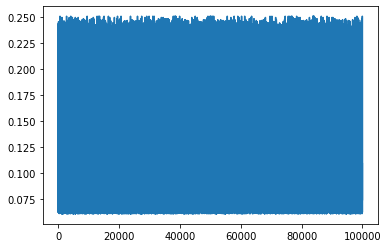

0.061068096521047076
[[  1.  -10.  -20. ]
 [  2.  -50.  -86.6]
 [  3.   50.  -86.6]]


In [52]:
import numpy as np
import math
from numpy.linalg import inv
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
area=1
E=10e6
nodes=int(input("Enter the nodes: "))

GLOBAL=np.zeros((nodes*2,nodes*2))
add=np.zeros((nodes*2,nodes*2))
joints=np.zeros((nodes,3))
small=np.zeros((2,2))

for i in range(nodes):
    print(i+1)
    joints[i][0]=i+1    #the joint number
    joints[i][1]=input("X:")
    joints[i][2]=input("Y:")
ELEMENT=int(input("Enter the ELEMENTS: "))
element=np.zeros((ELEMENT,9))
print("Enter the nodes one after the other corresponding to the element that is displayed")
for j in range(ELEMENT):
    print("\n")
    print("ELEMENT NUMBER:",j+1)
    element[j][0]=j+1
    element[j][1]=input("Enter the NODE I:")
    element[j][2]=input("Enter the NODE II:")
    #element[j][3]=input("Enter the angle   :")
    #element[j][3]=math.radians(element[j][3])
    try:
        element[j][3]=np.arctan((joints[int(element[j][2]-1)][2]-joints[int(element[j][1]-1)][2])/(joints[int(element[j][2]-1)][1]-joints[int(element[j][1]-1)][1]))
    except:
        element[j][3]=np.tan(90)
    element[j][4]=joints[int(element[j][1]-1)][1]
    element[j][5]=joints[int(element[j][1]-1)][2]
    element[j][6]=joints[int(element[j][2]-1)][1]
    element[j][7]=joints[int(element[j][2]-1)][2]
    element[j][8]=((element[j][4]-element[j][6])**2+(element[j][5]-element[j][7])**2)**0.5

Forces=np.zeros((nodes*2,1))
vi=int(input("Enter the Total number of nodes where Point loads are applied:"))
ForceNodenumbers=np.zeros((vi))
for i in range(vi):
    ForceNodenumbers[i]=int(input("Enter the Node numbers where Load is applied one by one:"))
for i in range(vi):
    print("\n")
    print("Force Input at Node: ",ForceNodenumbers[i])
    Forces[int(2*(ForceNodenumbers[i]-1))][0]=float(input("enter the X force in the Node:"))
    Forces[int((2*(ForceNodenumbers[i]-1))+1)][0]=float(input("enter the Y force in the Node:"))

def TRUSS(joints,element,GLOBAL,Forces,small,add):
    for i in range(ELEMENT):
        #print("Element:",element[i][0],"node connection:",element[i][1],element[i][2],"Angle:",np.degrees(element[i][3]),"L:",element[i][8])
        element[i][3]=np.arctan((joints[int(element[i][2]-1)][2]-joints[int(element[i][1]-1)][2])/(joints[int(element[i][2]-1)][1]-joints[int(element[i][1]-1)][1]))
        small[0][0]=round((np.cos(element[i][3])**2)*area*E/element[i][8],3)
        small[0][1]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][0]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][1]=round((np.sin(element[i][3])**2)*area*E/element[i][8],3)
        #print(small)
        #print(area*E/element[i][8])
        for x in range(nodes*2):
            for y in range(nodes*2):
                if(x==2*(element[i][1]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][1]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
        #print(add)
        GLOBAL=GLOBAL+add
        add.fill(0)
        small.fill(0)
    #print(GLOBAL)
    #GLOBAL=np.delete(GLOBAL, (7),axis=0)
    #GLOBAL=np.delete(GLOBAL, (6),axis=0)

    GLOBAL=np.delete(GLOBAL, (5),axis=0)
    GLOBAL=np.delete(GLOBAL, (4),axis=0)

    GLOBAL=np.delete(GLOBAL, (3),axis=0)
    GLOBAL=np.delete(GLOBAL, (2),axis=0)


    #GLOBAL=np.delete(GLOBAL, (7),axis=1)
    #GLOBAL=np.delete(GLOBAL, (6),axis=1)

    GLOBAL=np.delete(GLOBAL, (5),axis=1)
    GLOBAL=np.delete(GLOBAL, (4),axis=1)

    GLOBAL=np.delete(GLOBAL, (3),axis=1)
    GLOBAL=np.delete(GLOBAL, (2),axis=1)

    #Forces=np.delete(Forces, (7),axis=0)
    #Forces=np.delete(Forces, (6),axis=0)
    Forces=np.delete(Forces, (5),axis=0)
    Forces=np.delete(Forces, (4),axis=0)
    Forces=np.delete(Forces, (3),axis=0)
    Forces=np.delete(Forces, (2),axis=0)
    #print(GLOBAL)
    #print(Forces)
    Y=(np.dot(inv(GLOBAL),Forces))
    #print(joints)
    return Y[0][0]
O=[]
MinJoint=np.zeros((3,3))
MIN=30
for t in tqdm(range(100000)):
    #MIN=20 #TRUSS(joints,element,GLOBAL,Forces,small,add)
    O.append(float(TRUSS(joints,element,GLOBAL,Forces,small,add)))
    joints[0][1]=0+(-1**random.randint(1,2)*random.randint(1,25))
    joints[0][2]=0+(-1**random.randint(1,2)*random.randint(1,80))
    #plt.scatter(joints[0][1],joints[0][2])
    #plt.scatter(joints[1][1],joints[1][2])
    #plt.scatter(joints[2][1],joints[2][2])
    if TRUSS(joints,element,GLOBAL,Forces,small,add) < MIN:
        MinJoints=joints
        MIN=TRUSS(joints,element,GLOBAL,Forces,small,add)

plt.plot(O)
plt.show()
print(np.min(O))
print(MinJoints)
#TRUSS(joints,element,GLOBAL,Forces,small,add)
#joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
#joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))

In [17]:
from tkinter import *
window=Tk()
window.geometry('350x200')
window.title("welcome to LikeGeeks app")
lable=Label(window,text="Hello ",font=("Arial Bold",20))
lable.grid(column=0,row=0)

def clickme():
    lable.configure(text="Click me button was clicked")
button=Button(window,text="click me",command=clickme)
button.grid(column=0,row=2)

def clicked():
    lable.configure(text="Action Button was clicked")
button2=Button(window,text="Action button",command=clicked)
button2.grid(column=1,row=1)

window.mainloop()

[[  1.  -35.  -34. ]
 [  2.  -50.  -86.6]
 [  3.   50.  -86.6]]
-35.0 -34.0


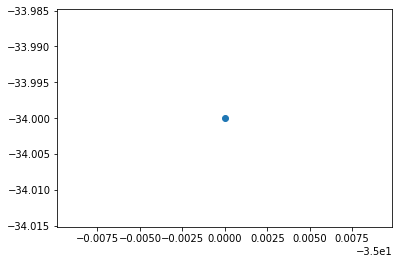

In [25]:
print(joints)
print(joints[0][1],joints[0][2])
plt.scatter(joints[0][1],joints[0][2])

In [46]:
T=[]
for u in range(90):
    T=u
print(np.min(T))

89
